# Importando as bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')

#Upload do arquivo

In [2]:
from google.colab import files
arq = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks.xlsx


In [3]:
# Criando o Dataframe
df = pd.read_excel('AdventureWorks.xlsx')

In [4]:
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [5]:
# Quantidade de Linhas e Colunas
df.shape

(904, 16)

In [6]:
# Tipos de dados
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [8]:
# Receita total
df['Valor Venda'].sum()

5984606.1426

In [12]:
# Custo total
df['Custo'] = df['Custo Unitário'].mul(df['Quantidade'])

In [13]:
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48


In [14]:
# Custo Total
round(df['Custo'].sum(), 2)

2486783.05

In [15]:
# Lucro Total
df['Lucro'] = df['Valor Venda'] - df['Custo']

In [16]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


In [17]:
# Coluna com total de dias para enviar o produto
df['Tempo envio'] = df['Data Envio'] - df['Data Venda']

In [18]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20 days


**Média do tempo de encio para cada Marca, para tanto será necessário transformar a coluna Tempo Envio em numérica, para que então possamos fazer cálculos com a mesma**

In [19]:
df['Tempo envio'] = (df['Data Envio'] - df['Data Venda']).dt.days

In [20]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52,20


In [21]:
df['Tempo envio'].dtype

dtype('int64')

In [22]:
df.groupby('Marca')['Tempo envio'].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo envio, dtype: float64

# Missing Values

In [23]:
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo             0
Lucro             0
Tempo envio       0
dtype: int64

**Lucro por ano e marca**

In [25]:
# Formatação para exibição de valores float
pd.options.display.float_format = '{:20,.2f}'.format

In [26]:
df.groupby([df['Data Venda'].dt.year, 'Marca'])['Lucro'].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: Lucro, dtype: float64

In [28]:
# Resetando o index
# Será criado um novo dataframe com o resultado da pesquisa.
lucro_ano = df.groupby([df['Data Venda'].dt.year, 'Marca'])['Lucro'].sum().reset_index()
lucro_ano

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [30]:
# Total de Produtos Vendidos
tt_produtos_vendidos = df.groupby('Produto')['Quantidade'].sum().sort_values(ascending = False)

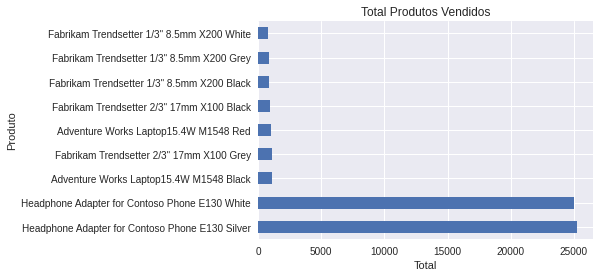

In [34]:
tt_produtos_vendidos.plot.barh(title='Total Produtos Vendidos')
plt.xlabel('Total')
plt.ylabel('Produto');

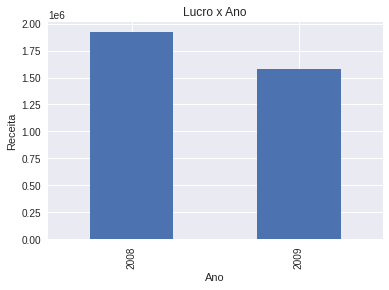

In [39]:
# Grpafico de Lucro por ano
df.groupby(df['Data Venda'].dt.year)['Lucro'].sum().plot.bar(title='Lucro x Ano')
plt.xlabel('Ano')
plt.ylabel('Receita');

In [40]:
df.groupby(df['Data Venda'].dt.year)['Lucro'].sum()

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: Lucro, dtype: float64

In [42]:
# Apenas as vendas de 2009
df_2009 = df[df['Data Venda'].dt.year == 2009]

In [43]:
df_2009.sample(5)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo envio
526,2009-10-07,2009-10-16,306,366,19075,200910073CS765,348.58,758.00,4,606.40,"2,425.60",Adventure Works Laptop15.4W M1548 Black,Adventure Works,Adventure Works,Regular,Black,"1,394.32","1,031.28",9
824,2009-03-07,2009-03-12,199,1202,18921,200903074CS830,330.66,998.00,6,299.40,"5,688.60",Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey,"Fabrikam, Inc.",Fabrikam,Regular,Grey,"1,983.96","3,704.64",5
647,2009-01-25,2009-01-30,306,1178,19061,200901254CS736,330.66,998.00,5,998.00,"3,992.00",Fabrikam Trendsetter 1/3'' 8.5mm X200 White,"Fabrikam, Inc.",Fabrikam,Regular,White,"1,653.30","2,338.70",5
716,2009-03-18,2009-03-30,307,2496,19118,200903185CS708,5.09,9.99,216,431.57,"1,726.27",Headphone Adapter for Contoso Phone E130 Silver,"Contoso, Ltd",Contoso,Economy,Silver,"1,099.44",626.83,12
748,2009-10-12,2009-10-21,306,2497,19075,200910125CS765,5.09,9.99,192,383.62,"1,534.46",Headphone Adapter for Contoso Phone E130 White,"Contoso, Ltd",Contoso,Economy,White,977.28,557.18,9


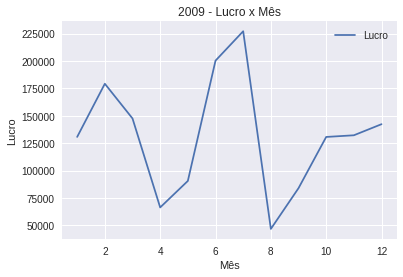

In [49]:
# Gráfico Lucro por mÊs de 2009
df_2009.groupby(df_2009['Data Venda'].dt.month)['Lucro'].sum().plot(title = '2009 - Lucro x Mês')
plt.xlabel('Mês')
plt.ylabel('Lucro')
plt.legend();

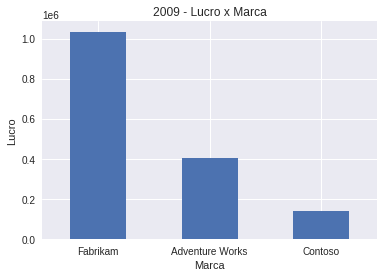

In [59]:
# Lucro por Marca em 2009
df_2009.groupby(df_2009['Marca'])['Lucro'].sum().sort_values(ascending=False).plot.bar(title='2009 - Lucro x Marca')
plt.xlabel('Marca')
plt.ylabel('Lucro')
plt.xticks(rotation='horizontal');

In [63]:
df_2009.groupby('Marca')['Lucro'].sum().sort_values(ascending=False)

Marca
Fabrikam                  1,034,091.35
Adventure Works             405,395.08
Contoso                     138,258.95
Name: Lucro, dtype: float64

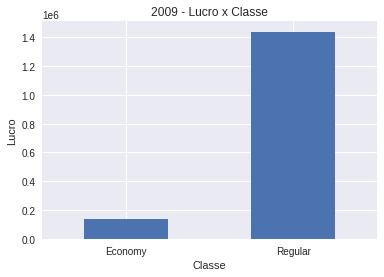

In [65]:
# Lucro por clase 2009
df_2009.groupby('Classe')['Lucro'].sum().plot.bar(title='2009 - Lucro x Classe')
plt.xticks(rotation='horizontal')
plt.xlabel('Classe')
plt.ylabel('Lucro');

In [68]:
# Analise sobre o tempo de envio
df['Tempo envio'].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo envio, dtype: float64

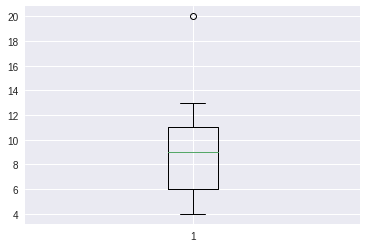

In [69]:
# Gráfico de Boxplot
plt.boxplot(df['Tempo envio']);

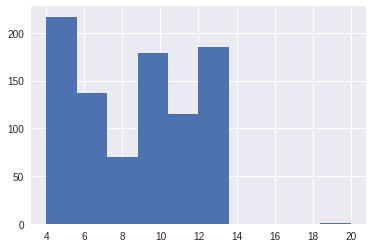

In [71]:
# Histograma
plt.hist(df['Tempo envio']);

In [72]:
df['Tempo envio'].min()

4

In [73]:
df['Tempo envio'].max()

20

In [74]:
# Identificando o Outlier
df[df['Tempo envio'] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [75]:
df.to_csv('df_vendas_novo.csv', index=False)